In [83]:
import random
import math
import time
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
TT = 0
def randomquicksort(alist,times,tmean):
   comp = [0]
   global TT
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   if (comp[0]>tmean):
      TT= TT+1
   times.append(comp[0])

In [72]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [73]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart

In [93]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    tmean = 1.38*n*math.log(n, 2)
    global TT
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
          y = list(x)
          randomquicksort(y,tlist,tmean*1.5)
          
        
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    emean = statistics.mean(tlist)
    print("n",n)
    print("runs",runs)
    print("mean",emean)
    print("theoretical mean", tmean)
    print("deference with the  theoretical average",tmean-emean)
    print("1.5 times more than the theoretical average", TT)
    print("stdev",statistics.stdev(tlist))
    print("min",min(tlist))
    print("max",max(tlist))

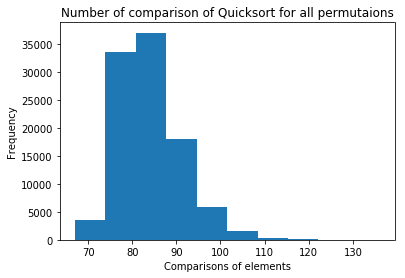

n 16
runs 100000
mean 83.64826
theoretical mean 88.32
deference with the  theoretical average 4.67174
1.5 times more than the theoretical average 1
stdev 7.061428864626203
min 67
max 136
Tiempo total de ejecucion:  9.172604784453682


In [95]:
TT = 0
ti =time.clock()
randomquicksorttimedistrib(16,10000000)
tf =time.clock()
print ("Tiempo total de ejecucion: ", tf-ti)